<a href="https://colab.research.google.com/github/MariamKotob/ML2-notebook/blob/master/6_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
from pydot import graph_from_dot_data

import pandas as pd
import numpy as np

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [9]:
#The dataset as a whole in one variable 
Iris = load_iris()

# Dividing dataset to group of features
### Transform the data to dataframe from Pandas lib
x = pd.DataFrame(Iris.data, columns=Iris.feature_names)

#Get the labels from dataset
y = pd.Categorical.from_codes(Iris.target, Iris.target_names)

#show sample data
x.head(10) 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [12]:
#Divide the current data into testing and training
##Assign the spletted data into 4 vaiables that are training(features &labels), testing(features &predictions)
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)

#stats
#The whole data set length
len(x)

150

In [13]:
#training data length
len(x_train)

112

In [15]:
#testing data length 
len(x_test)

38

In [17]:
#Call the model and start training
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

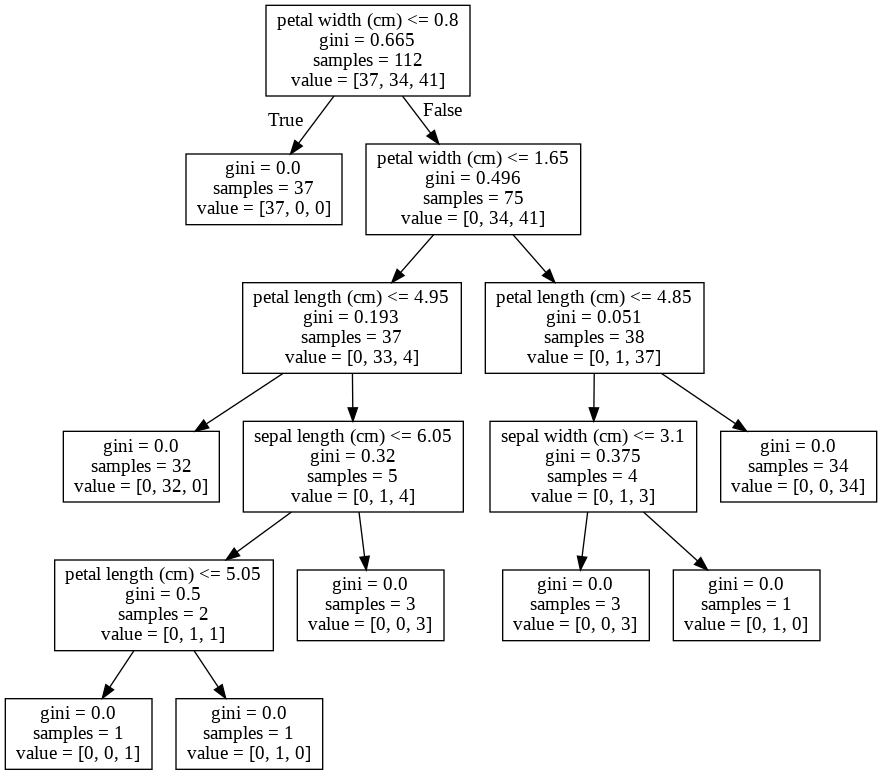

In [19]:
#Show the built decision tree model
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data, feature_names=Iris.feature_names)
(graph, ) = graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [21]:
#Testing the model performance 
y_pred = dt.predict(x_test)
species = np.array(y_test)
prediction = np.array(y_pred) 

#performance evaluation using confusion matrix
confusion_matrix(species, prediction) 

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]])

So 13 data points were classified correctly as the first class, 

15 were classified correctly as the second class but one misclasified but were supposed to be a second,

and 9 data points were classified correctly as the third class